# Определение перспективного тарифа для телеком компании.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег

#### Оглавление: 
<a class="anchor" id="step_0"></a>  
* [1. Загрузка файлов с данными и изучение общей информации.](#step_1)
* [2. Подготовка данных](#step_2)
 * [2.1. Приведение данных к корректным типам](#step_2.1)
 * [2.2. Исправление ошибок в данных](#step_2.2) 
 * [2.3. Добавление недостающих данных](#step_2.3) 
* [3. Анализ полученных данных](#step_3)
 * [3.1. Сравнение длительности звонков пользователей двух тарифов](#step_3.1) 
 * [3.2. Сравнение использования интернет трафика пользователями двух тарифов](#step_3.2) 
 * [3.3. Сравнение количества отправленных сообщений пользователями двух тарифов](#step_3.3)
 * [3.4. Расчет и анализ стандартного отклонения и распределений](#step_3.4) 
* [4. Проверка гипотез](#step_4)
* [5. Общий вывод](#step_5)


## 1. Загрузка файлов с данными и изучение общей информации.   
<a class="anchor" id="step_1"></a>

[к оглавлению](#step_0)


In [1]:
import pandas as pd # Импортируем необходимые библиотеки
import numpy as np
from scipy import stats as st
from math import sqrt, ceil
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings # отключим предупреждения анаконды
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,6)
pd.set_option('max_columns', None)
pd.options.display.float_format = '{:.2f}'.format # Зададим удобный формат отображения вещественных чисел

In [2]:
def get_name(obj):
    name =[x for x in globals() if globals()[x] is obj][0]
    return name

Загрузим файлы с данными

In [3]:
calls_df = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/calls.csv')
internet_df = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/internet.csv', index_col=0)
messages_df = pd.read_csv('//Users/victorchudnovskiy/Documents/raw_csv/messages.csv')
tariffs_df = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/tariffs.csv')
users_df = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/users.csv')

Просмотрим содержание первых пяти строк наших датафреймов, после чего выведем общую информацию по всем таблицам

In [4]:
# Приготовим список для группового вывода содной информации
df_list = [calls_df, internet_df, messages_df, tariffs_df, users_df]

In [5]:
for df in df_list:
    print(f'Исследуем датафрейм {get_name(df)}')
    display(df.head())
    display(df.info())

Исследуем датафрейм calls_df


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Исследуем датафрейм internet_df


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

Исследуем датафрейм messages_df


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Исследуем датафрейм tariffs_df


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Исследуем датафрейм users_df


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [6]:
# Проверим на дубликаты пять таблиц
for df in df_list:
    print(df.duplicated().sum(), end='')

00000

### Вывод
На первом этапе исследования мы определили какая информация содержится в пяти таблицах, это:
- информация о дительности звонков совершенных пользователями
- информация о дительности интернет сессий
- информация о количестве отправленных смс
- описание тарифов
- данные пользователей и их принадлежность к определенным тарифам  

Сразу же обращается внимание на то что все временнЫе данные представленны типом `object`  

В таблице с данными о пользователях, информация о дате прекращения действия тарифа заполнена всего 38 строками, это не явлется ошибкой, а лишь индикатор того что на момент выгрузки тариф еще действовал.  

Проверка на наличие дубликатов ошибок не выявила.
[к оглавлению](#step_0)

## 2. Подготовка данных. 
<a class="anchor" id="step_2"></a>  

[к оглавлению](#step_0)

**2.1.** Приведение данных к корректным типам.  
На предыдущем этапе анализа было выявлено несоответствие типов дат и наличие лишних столбцов. Приведем данные в порядок и поищем возможно другие несоответствия.
<a class="anchor" id="step_2.1"></a>
[к оглавлению](#step_0)

In [7]:
calls_df['call_date']= pd.to_datetime(calls_df['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet_df['session_date']= pd.to_datetime(internet_df['session_date'], format='%Y-%m-%dT%H:%M:%S')
messages_df['message_date']= pd.to_datetime(messages_df['message_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['churn_date']= pd.to_datetime(users_df['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['reg_date']= pd.to_datetime(users_df['reg_date'], format='%Y-%m-%dT%H:%M:%S')

Согласно принципам тарификации принятым у оператора сотовой связи округлим значения длительности звонков и использованных мегабайтов трафика до целых значений в сторону увеличения.

In [8]:
# Применим метод apply к нужным столбцам в сочетании с безымянной функцией , которая заменяет старое значение на окгугленное вверх
# с помощью функции ceil из модуля math
calls_df['duration'] = calls_df['duration'].apply(lambda x: ceil(x))
internet_df['mb_used'] = internet_df['mb_used'].apply(lambda x: ceil(x))

Проверим результат преобразований выводом информации по пяти датафреймам

In [9]:
# Выведем информацию по пяти таблицам
for df in df_list:
    print(f'Исследуем датафрейм {get_name(df)}')
    display(df.head())
    display(df.info())

Исследуем датафрейм calls_df


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

Исследуем датафрейм internet_df


,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB


None

Исследуем датафрейм messages_df


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

Исследуем датафрейм tariffs_df


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Исследуем датафрейм users_df


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

Судя по сводной информации данные приведены к правильным типам

**2.2.** Исправление ошибок в данных. 
[к оглавлению](#step_0)  

Для этого проверим описательные статистики по двум количественным параметрам первых двух таблиц, а именно:
- длительности звонков
- израсходованных мегабайтах трафика  

Для наглядности выведем гистограммы по этим двум столбцам
<a class="anchor" id="step_2.2"></a>

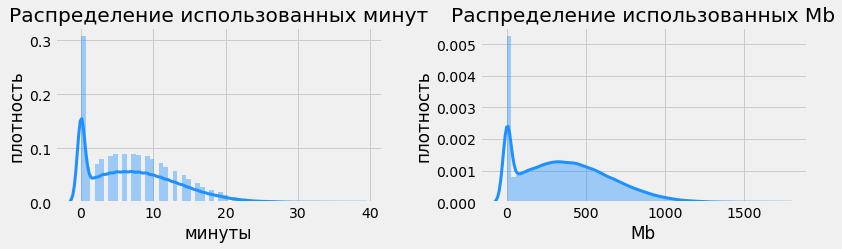

In [10]:
fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(12, 3))
sns.distplot(calls_df['duration'], 
             bins=60, color="dodgerblue", 
             label="Compact", 
             kde_kws={'linewidth':3}, 
             ax = ax11).set(title='Распределение использованных минут', xlabel='минуты', ylabel='плотность')
sns.distplot(internet_df['mb_used'], 
             bins=60, color="dodgerblue", 
             label="Compact", 
             kde_kws={'linewidth':3}, 
             ax = ax12).set(title='Распределение использованных Mb', xlabel='Mb', ylabel='плотность')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Статистики сигнализируют о наличии нулевых значений, а графики демонстрируют неестественное распределение частот. Нули в длительности звонков это скорее всего пропущенные вызовы, а в использованом трафике - попытки смартфонов обновить приложения. В любом случае, такое количество нулей в этих показателях лишнее. Целесообразней будет заменить их NaN

In [11]:
calls_df['duration'].replace(0, np.nan, inplace=True)
internet_df['mb_used'].replace(0, np.nan, inplace=True)

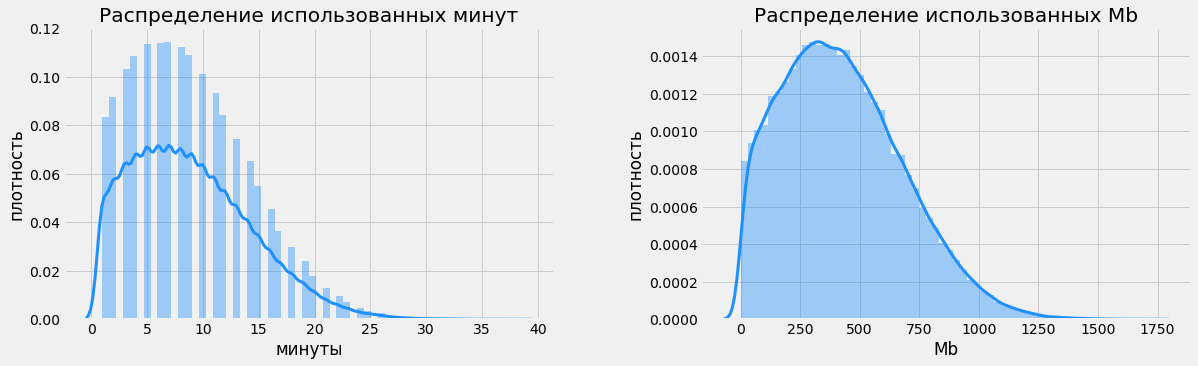

In [12]:
fig, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
sns.distplot(calls_df['duration'], 
             bins=60, color="dodgerblue", 
             label="Compact", 
             kde_kws={'linewidth':3}, 
             ax = ax11).set(title='Распределение использованных минут', xlabel='минуты', ylabel='плотность')
sns.distplot(internet_df['mb_used'], 
             bins=60, color="dodgerblue", 
             label="Compact", 
             kde_kws={'linewidth':3}, 
             ax = ax12).set(title='Распределение использованных Mb', xlabel='Mb', ylabel='плотность')
plt.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show()

При не изменнившемся количестве пользователей из наших данных удалились нули, минимальная длительность звонка теперь 1 минута. Даже если пользователь набрал номер и не туда попал оператор зачтет разговор как минутный. С потребленным трафиком аналогичная ситуация.

**2.3.** Добавление недостающих данных.
<a class="anchor" id="step_2.3"></a>
[к оглавлению](#step_0)

Создадим рабочий датафрейм со всеми месяцами интересующего периода, на который будем навешивать агрегированную информацию из всех частных таблиц

In [13]:
df = pd.DataFrame(pd.date_range('2018-1-1','2018-12-31',freq='MS'))
df['key'] = 1
df.rename({0: 'month'},axis=1,inplace=True)

Создадим временный ключ "1" чтобы было за что зацепиться и приссоединим таблицу с пользователями к рабочему датафрейму

In [14]:
users_df['key'] = 1

In [15]:
df = df.merge(users_df,how='left',on='key')
df.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


В каждую из таблиц с минутами трафиком и смс добавим столбец с месяцем, сгруппируем по месяцу и клиенту и приссоеденим к рабочему датафрейму

In [16]:
calls_df['call_month'] = calls_df['call_date'].astype('datetime64[M]')
df = df.merge(calls_df.
              groupby(['user_id', 'call_month']).
              agg({'duration':'sum'}).
              reset_index(),how='left',left_on=['user_id','month'], right_on=['user_id','call_month'])
df.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,call_month,duration
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaT,NaN
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaT,NaN
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaT,NaN


In [17]:
internet_df['session_month'] = internet_df['session_date'].astype('datetime64[M]')
df = df.merge(internet_df.
              groupby(['user_id', 'session_month']).
              agg({'mb_used':'sum'}).
              reset_index(),how='left',left_on=['user_id','month'], right_on=['user_id','session_month'])
df.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,call_month,duration,session_month,mb_used
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaT,NaN,NaT,NaN
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaT,NaN,NaT,NaN
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaT,NaN,NaT,NaN


In [18]:
messages_df['message_month'] = messages_df['message_date'].astype('datetime64[M]')
df = df.merge(messages_df.
              groupby(['user_id', 'message_month']).
              agg({'id':'count'}).
              reset_index(),how='left',left_on=['user_id','month'], right_on=['user_id','message_month'])
df = df.rename(columns={'id': 'message_amount'})
df.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,call_month,duration,session_month,mb_used,message_month,message_amount
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaT,NaN,NaT,NaN,NaT,NaN
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaT,NaN,NaT,NaN,NaT,NaN
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaT,NaN,NaT,NaN,NaT,NaN


Также добавим в рабочий датафрейм параметры каждого тарифа

In [19]:
df = df.merge(tariffs_df,how='left',left_on='tariff',right_on='tariff_name')
df.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,call_month,duration,session_month,mb_used,message_month,message_amount,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaT,NaN,NaT,NaN,NaT,NaN,1000,30720,3000,1950,150,1,1,ultra
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaT,NaN,NaT,NaN,NaT,NaN,50,15360,500,550,200,3,3,smart
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaT,NaN,NaT,NaN,NaT,NaN,50,15360,500,550,200,3,3,smart


Преобразуем дату подключения и дату выхода пользователя в месяц. После чего удалим ненужные столбцы из рабочего датафрейма

In [20]:
df['churn_date_month'] = df['churn_date'].astype('datetime64[M]')
df['reg_date_month'] = df['reg_date'].astype('datetime64[M]')
df['pmonth'] = df['month'] - pd.DateOffset(months=1)
df = df.query('month >= reg_date_month').copy()
df = df.drop(['key','call_month','session_month','message_month'], axis=1)
df['city_group'] = df['city'].where(df['city'] == "Москва", 'Другие')

In [21]:
df['month'] = df['month'].dt.to_period('M')
df['pmonth'] = df['pmonth'].dt.to_period('M')
df['reg_date_month'] = df['reg_date_month'].dt.to_period('M')
df['churn_date_month'] = df['churn_date_month'].dt.to_period('M')

Добавим в рабочий датафрейм расчитанный доход с кажого пользователя в разрезе минут, трафик и смс

In [22]:
# Создадим функции для определения дохода от одного пользователя
def income_over_minutes(row):
    # Если превышен лимит по минутам умножим превышение на цену минуты, если превышения нет оставляем ноль
    if row['duration'] > row['minutes_included']:
        income_minutes = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    else:
        income_minutes = 0
    return income_minutes  
# Если превышен лимит по Мб доведем превышение до целого числа Гб и умножим на цену Гб
def income_over_gb(row):
    if row['mb_used'] > row['mb_per_month_included']:
        income_gb = ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    else:
        income_gb = 0
    return income_gb
# Если превышен лимит по смс умножим превышение на цену смс
def income_over_sms(row):
    if row['message_amount'] > row['messages_included']:
        income_sms = (row['message_amount'] - row['messages_included']) * row['rub_per_message']
    else:
        income_sms = 0
    return income_sms

In [23]:
df['income_minutes'] = df.apply(income_over_minutes, axis=1)
df['income_gb'] = df.apply(income_over_gb, axis=1)
df['income_sms'] = df.apply(income_over_sms, axis=1)
df['income'] = (df['income_minutes'] +
                df['income_gb'] +
                df['income_sms'] +
                df['rub_monthly_fee'])
# Выброчно проверим содержание финальной таблицы
df[df['user_id'] == 1000]

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,mb_used,message_amount,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,churn_date_month,reg_date_month,pmonth,city_group,income_minutes,income_gb,income_sms,income
2000,2018-05,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.00,2256.00,22.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-04,Другие,0.00,0,0.00,1950.00
2500,2018-06,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.00,23257.00,60.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-05,Другие,0.00,0,0.00,1950.00
3000,2018-07,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.00,14016.00,75.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-06,Другие,0.00,0,0.00,1950.00
3500,2018-08,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.00,14070.00,81.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-07,Другие,0.00,0,0.00,1950.00
4000,2018-09,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.00,14581.00,57.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-08,Другие,0.00,0,0.00,1950.00
4500,2018-10,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,350.00,14717.00,73.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-09,Другие,0.00,0,0.00,1950.00
5000,2018-11,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,338.00,14768.00,58.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-10,Другие,0.00,0,0.00,1950.00
5500,2018-12,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,333.00,9827.00,70.00,1000,30720,3000,1950,150,1,1,ultra,NaT,2018-05,2018-11,Другие,0.00,0,0.00,1950.00


Финальная таблица окончательно укомплектованна данными. Все данные ожидаемы и приведены к своему типу. Приступим к анализу.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 5 to 5999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3259 non-null   period[M]     
 1   user_id                3259 non-null   int64         
 2   age                    3259 non-null   int64         
 3   churn_date             232 non-null    datetime64[ns]
 4   city                   3259 non-null   object        
 5   first_name             3259 non-null   object        
 6   last_name              3259 non-null   object        
 7   reg_date               3259 non-null   datetime64[ns]
 8   tariff                 3259 non-null   object        
 9   duration               3174 non-null   float64       
 10  mb_used                3203 non-null   float64       
 11  message_amount         2717 non-null   float64       
 12  messages_included      3259 non-null   int64         
 13  mb_

In [25]:
df['new'] = (df['month'] == df['reg_date_month']) * 1
df['churn'] = (df['month'] == df['churn_date_month']) * 1
df['user'] = 1
rep = df.groupby(['month', 'pmonth','tariff'])['user', 'new', 'churn'].sum().reset_index()
rep.tail()

,month,pmonth,tariff,user,new,churn
19,2018-10,2018-09,ultra,126,10,4
20,2018-11,2018-10,smart,323,27,6
21,2018-11,2018-10,ultra,141,15,2
22,2018-12,2018-11,smart,351,28,10
23,2018-12,2018-11,ultra,149,8,6


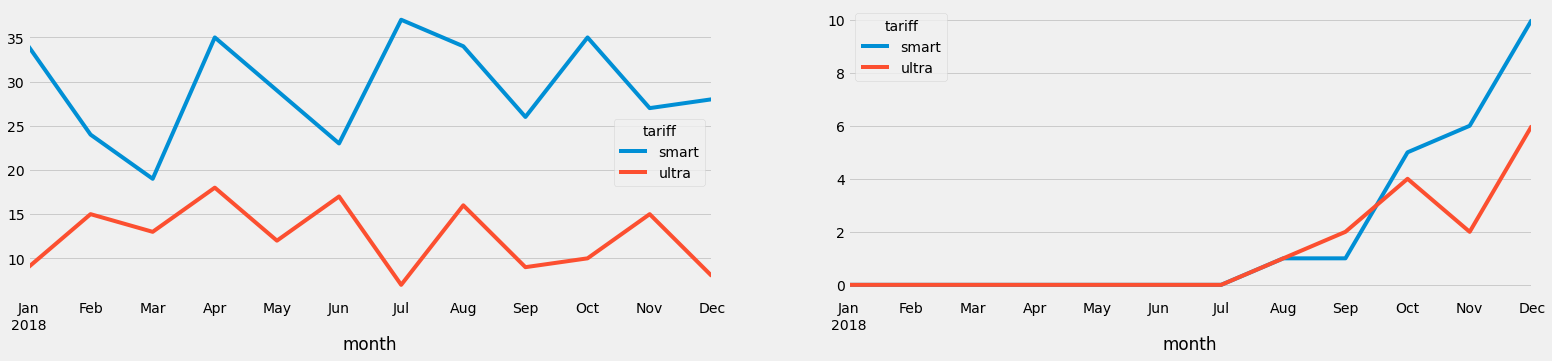

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(24, 5))
df.groupby(['month','tariff'])['new'].sum().unstack().plot(ax=axs[0])
df.groupby(['month','tariff'])['churn'].sum().unstack().plot(ax=axs[1])
plt.show()

In [27]:
rep['churn'] = rep['churn'] * -1

In [28]:
rep.set_index('month', inplace=True)

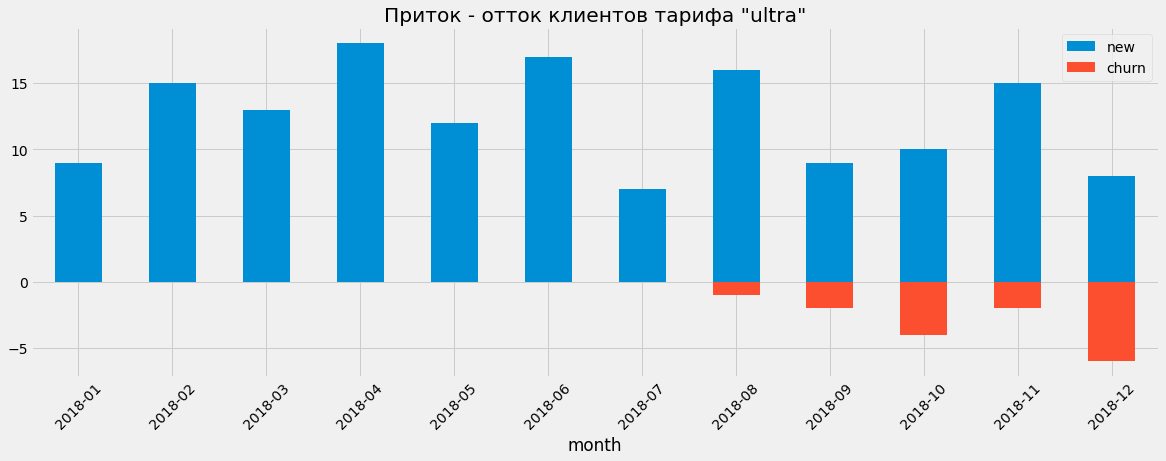

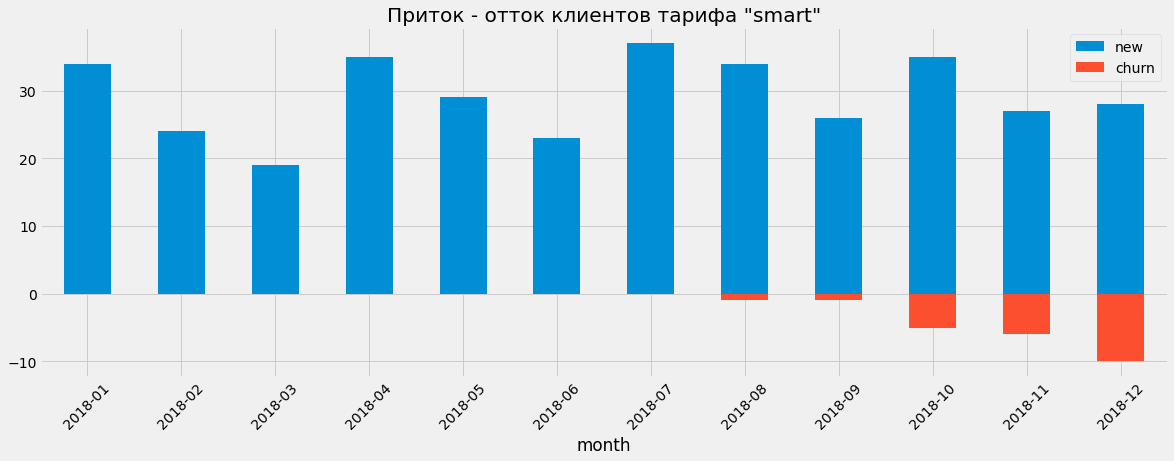

In [29]:
for i, item in enumerate(['ultra', 'smart']):
    rep.query('tariff == @item')[['new', 'churn']].plot(kind='bar', stacked=True)
    plt.xticks(rotation=45)
    plt.title(f'Приток - отток клиентов тарифа "{item}"')

## 3. Анализ полученных данных.
<a class="anchor" id="step_3"></a>
[к оглавлению](#step_0)

**3.1.** Сравнение длительности звонков пользователей двух тарифов.  
<a class="anchor" id="step_3.1"></a>
[к оглавлению](#step_0)

In [30]:
# Сформируем вспомогательную сводную таблицу, на базе которой построим необходимые статистики и графики.
duration_plots = df.pivot_table(index='month', columns='tariff', values='duration')

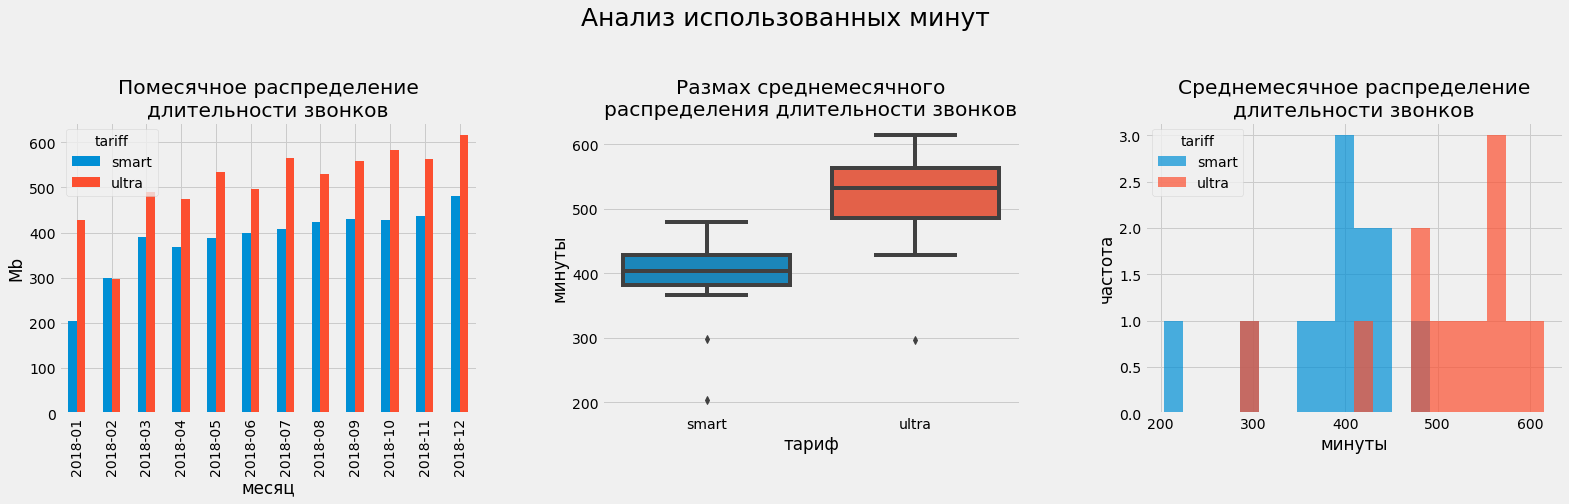

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))
duration_plots.plot(kind='bar', 
                    grid=True, 
                    ax = axs[0]).set(title='Помесячное распределение\nдлительности звонков', 
                                     xlabel='месяц', ylabel='Mb',)
sns.boxplot(data=duration_plots, 
            ax = axs[1]).set(title='Размах среднемесячного\nраспределения длительности звонков', 
                             xlabel='тариф', ylabel='минуты')
duration_plots.plot(kind='hist',
                    bins=20, 
                    alpha=0.7, ax =axs[2]).set(title='Среднемесячное распределение\nдлительности звонков', 
                                              xlabel='минуты', ylabel='частота')
plt.subplots_adjust(wspace=0.30, hspace=0.5)
plt.suptitle('Анализ использованных минут', size=25, y=1.2)
plt.show()

**Вывод** 

- В январе пользователи Smart наименее активны, чего не скажешь об Ultra. Видимо на протяжении новогодних каникул пользователи чаще погружены в себя а может просто одиноки. 
- С марта средний расход минут у пользователей двух тарифов незначительно растет от начала к концу года.
- Усатые ящики демонстрируют слегка увеличенный разброс длительности разговорв у пользователй Ultra и судя по медиане в сторону увеличения. Это объясняется повышенным лимитом. 
- Предыдущие выводы подтверждаются гистограммами. Пользователи Smart в седнем стараются экономить минуты и почти вплотную подходят к лимиту. Пользователи Ultra до лимита еще далеко, от того они и не стесняются поговорить.

**3.2.** Сравнение использования интернет трафика пользователями двух тарифов.  
<a class="anchor" id="step_3.2"></a>
[к оглавлению](#step_0)

In [32]:
# Сформируем вспомогательную сводную таблицу, на базе которой построим необходимые статистики и графики.
internet_plots = df.pivot_table(index='month', columns='tariff', values='mb_used')

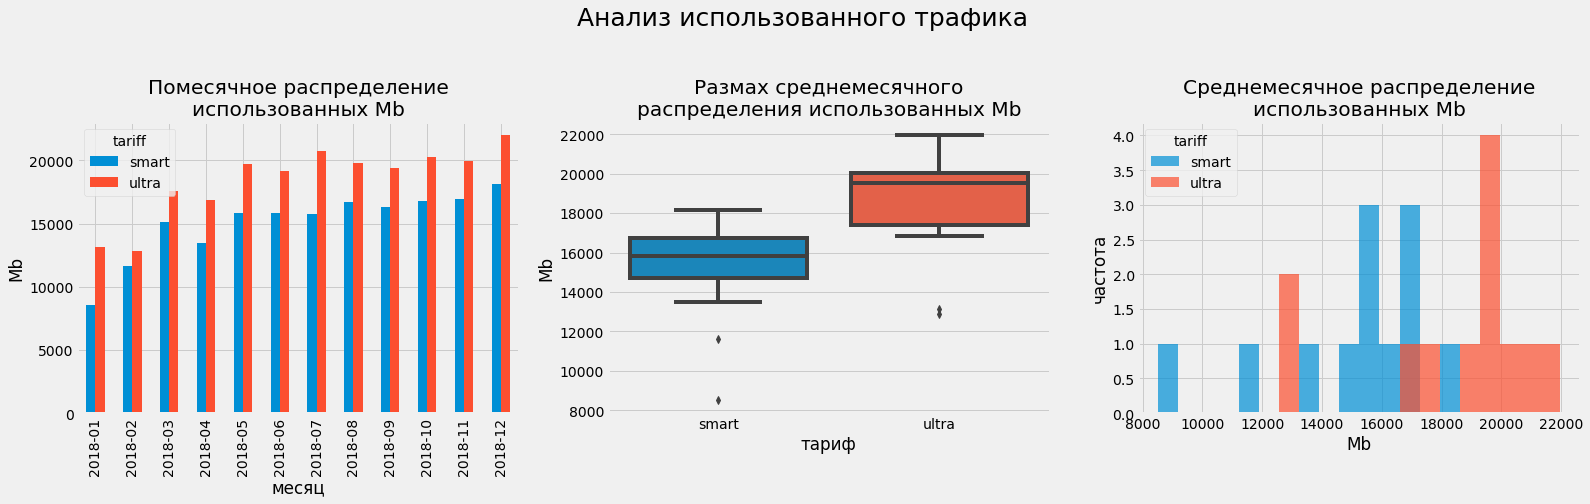

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))
internet_plots.plot(kind='bar', grid=True, ax = axs[0]).set(title='Помесячное распределение\nиспользованных Mb', xlabel='месяц', ylabel='Mb')
sns.boxplot(data=internet_plots, ax = axs[1]).set(title='Размах среднемесячного\nраспределения использованных Mb', xlabel='тариф', ylabel='Mb')
internet_plots.plot(kind='hist',
                    bins=20, 
                    alpha=0.7, ax =axs[2]).set(title='Среднемесячное распределение\nиспользованных Mb', xlabel='Mb', ylabel='частота')
plt.suptitle('Анализ использованного трафика', size=25, y=1.2)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

**Вывод**   
[к оглавлению](#step_0)  

Использование трафика слегка отличается от картины использованых минут, но в целом картина схожа.
- В январе пользователи Smart также наименее активны, такая же завышенная активность пользователй Ultra. 
- С марта средний расход Мб у пользователей двух тарифов также растет от начала к концу года (у пользоватей Ultra рост более интенсивный), но в отличии от ституации с минутами пользователи Smart чаще уходят в перерасход.
- Усатые ящики подтверждают это предположение, медиана близка к 16000 при лимите в 15360. 
- Предыдущие выводы подтверждаются и гистограммами. У пользователи Smart средний расход от 15000, тогда как пользователи спокойно чувствуют себя в лимите.


**3.3.** Сравнение количества отправленных сообщений пользователями двух тарифов.
<a class="anchor" id="step_3.3"></a>
[к оглавлению](#step_0)

In [34]:
# Сформируем вспомогательную сводную таблицу, на базе которой построим необходимые статистики и графики.
messages_plots = df.pivot_table(index='month', columns='tariff', values='message_amount')

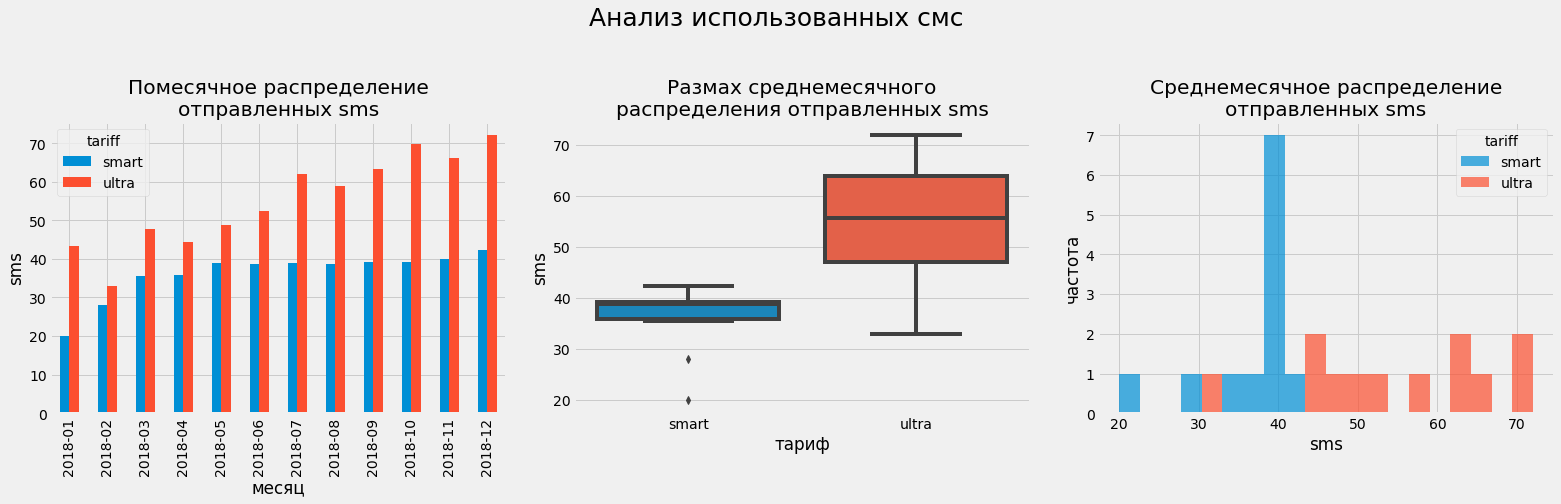

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(24, 5))
messages_plots.plot(kind='bar', grid=True, ax = axs[0]).set(title='Помесячное распределение\nотправленных sms', xlabel='месяц', ylabel='sms')
sns.boxplot(data=messages_plots, ax = axs[1]).set(title='Размах среднемесячного\nраспределения отправленных sms', xlabel='тариф', ylabel='sms')
messages_plots.plot(kind='hist',
                    bins=20, 
                    alpha=0.7, ax =axs[2]).set(title='Среднемесячное распределение\nотправленных sms', xlabel='sms', ylabel='частота')
plt.subplots_adjust(wspace=0.15, hspace=0.5)
plt.suptitle('Анализ использованных смс', size=25, y=1.2)
plt.show()

**Вывод** 

Использование смс слегка отличается от предыдущих расходов пользователей, но все же имеет общую тенденцию:
- Январь для пользователей Smart также самый спокойный, чего не скажешь о пользователях Ultra. 
- С марта средний расход сообщений в тарифе Smart практически не растет, увеличивается лишь в декабре. Пользователи Ultra не привыкли загонять себя рамки. Благо лимит в 1000 смс позволяет.
- Усатые ящики и гистограмма говорят о том же. У Smart медиана слилась с третьим квартилем около значения 40, значит это преобладающая средняя величина, у Ultra разброс существенней от 38 до 73 и все в пределах лимита.

**3.4.** Расчет и анализ стандартного отклонения и распределений  
<a class="anchor" id="step_3.4"></a>
[к оглавлению](#step_0)

In [36]:
# Приготовим список интересующих измерений
column_list = ['duration', 'mb_used', 'message_amount', 'income']

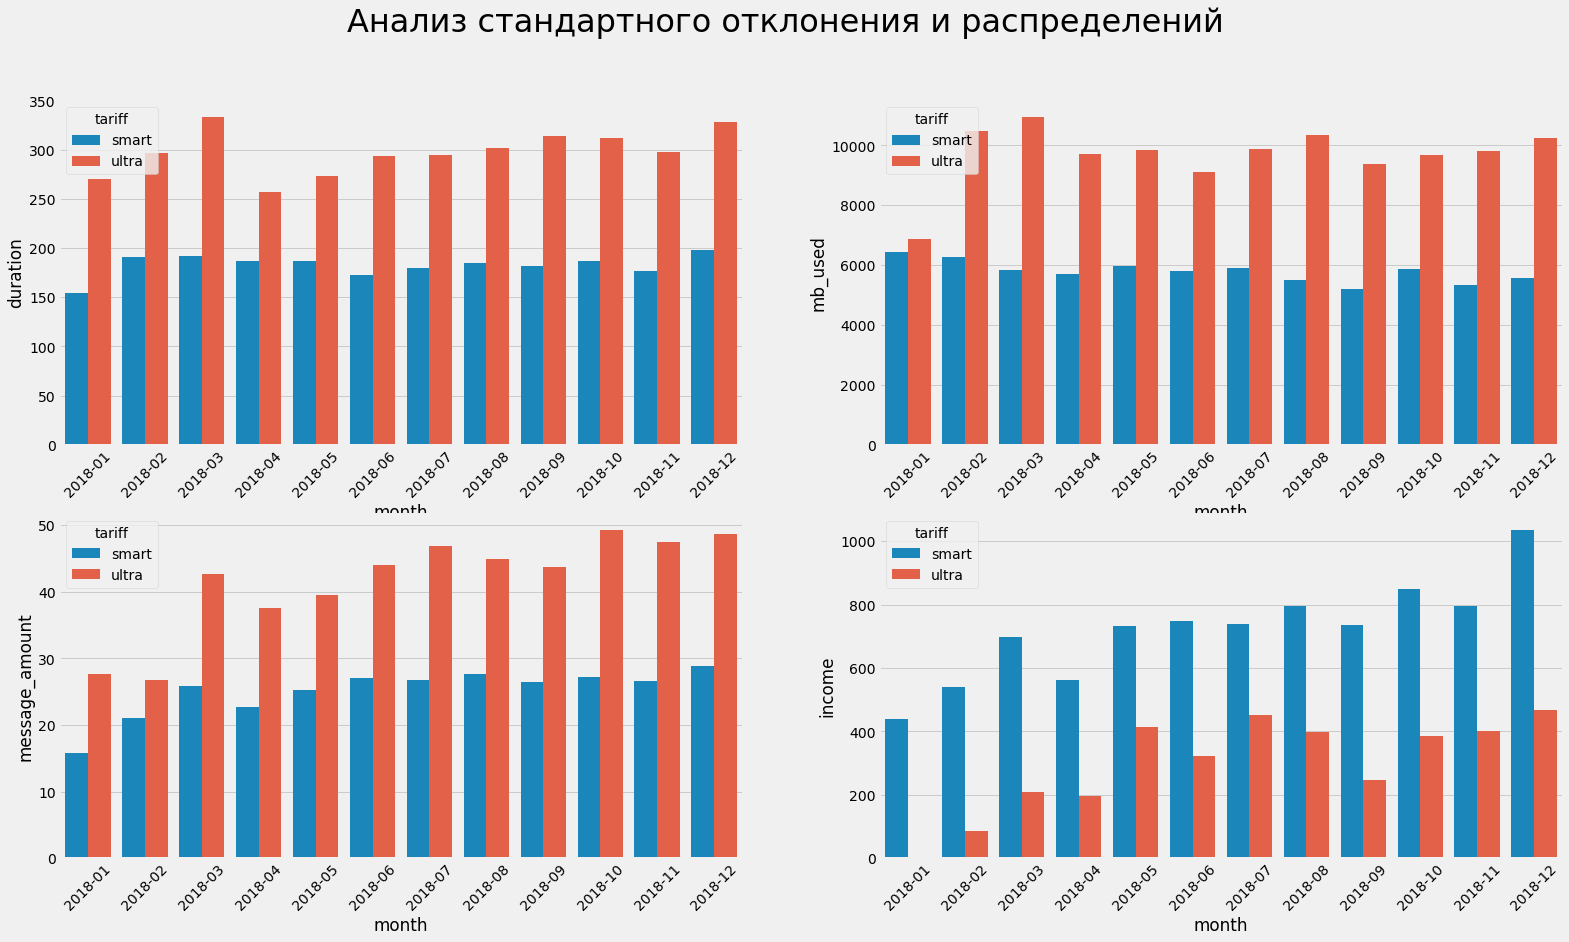

In [37]:
# Выведем в цикле графики стандартного отклонения по столбцам из списка
fig = plt.figure(figsize=(24,13))
plt.suptitle('Анализ стандартного отклонения и распределений', size=32)
for i, item in enumerate(column_list):
    fig.add_subplot(2, 2, i+1)
    data = df.groupby(['month','tariff']).agg({item:'std'}).reset_index()
    sns.barplot(x='month', 
                y=item, hue='tariff',data=data)
    plt.xticks(rotation=45)

Первые три графика показвают меньшее стандартное отклонение у пользователей Smart чем у Ultra. Это говорит о меньшем разбросе значений вокруг средней по выборке, и как следствие ограниченности клиентов Smart своими лимитами.  

Ситуация с доходом выглядит иначе. Стандартное отклонение Ultra ниже. Это значит доход полученный от таких пользователей менее разбросан вокруг абонплаты, а пользователи Smart чаще уходят в перерасход, и как мы вяснили ранее, из-за мобильного интернета.

Сравним гистограммы распределения частот интересующих измерений между пользователями двух тарифов и между городами

In [38]:
ultra_df = df.query('tariff == "ultra"')
smart_df = df.query('tariff == "smart"')

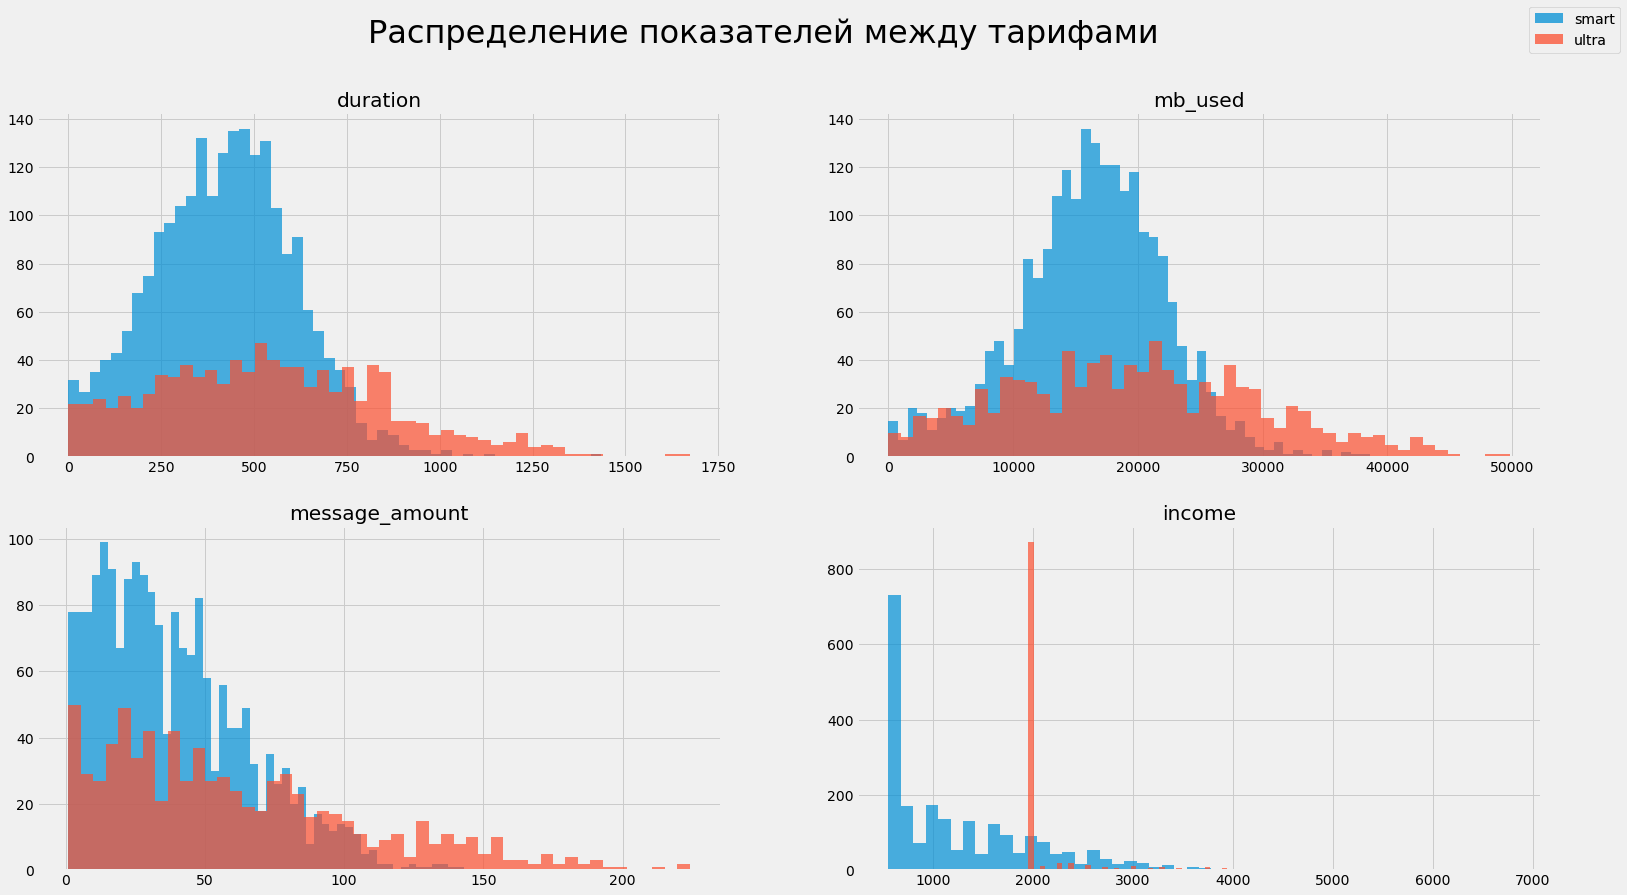

In [39]:
fig = plt.figure(figsize=(24,13))
plt.suptitle('Распределение показателей между тарифами', size=32)
for i, item in enumerate(column_list):
    fig.add_subplot(2, 2, i+1)
    ax = smart_df[item].hist(bins=50, alpha=0.7)
    ultra_df[item].hist(bins=50, alpha=0.7, ax = ax)
    plt.title(item)
    fig.legend(labels=['smart','ultra'])

Гистограммы демонстрируют предсказуемое поведения пользователей двух тарифов выяленное на предыдущих выводах. Пользователи Smart как ни стараются сдерживаться все равно уходят в перерасход (у них более сжатое и вытянутое распределение).  

Доход Smart не так редко сформирован не одной лишь абонплатой, но и перерасходом единиц. Ultra напротив - практически весь сформирован абонплатой причем пользователи ничем неограничены

In [40]:
moscow_city = df.query('city == "Москва"')
other_city = df.query('city != "Москва"')

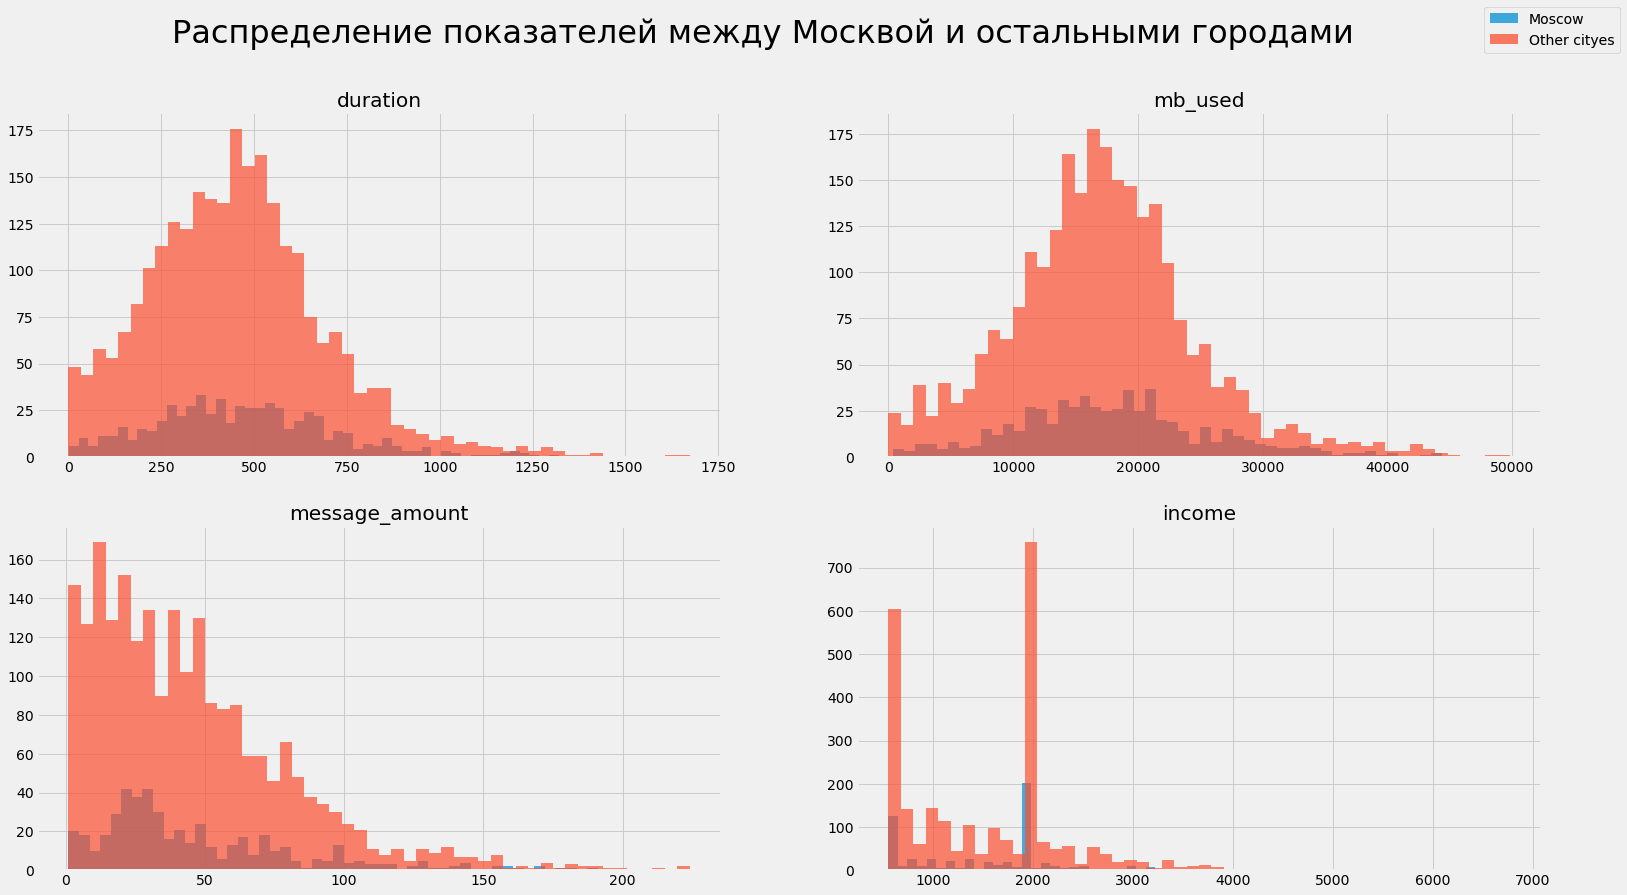

In [41]:
fig = plt.figure(figsize=(24,13))
plt.suptitle('Распределение показателей между Москвой и остальными городами', size=32)
for i, item in enumerate(column_list):
    fig.add_subplot(2, 2, i+1)
    ax = moscow_city[item].hist(bins=50, alpha=0.7)
    other_city[item].hist(bins=50, alpha=0.7, ax = ax)
    plt.title(item)
    fig.legend(labels=['Moscow','Other cityes'])

### Распредения измерений пользователей в разрезе городов показывают иную картину. Поведение пользоватей мало чем отличается. Гистограммы отличаются лишь высотой, а значит частотой или количеством пользователей.

Вывод числовых сравнений полностью согласуется с графиками:

In [42]:
df.pivot_table(columns='tariff', values=column_list, aggfunc=['mean', 'std'])

mean              std        
tariff            smart    ultra   smart   ultra
duration         419.06   545.45  189.33  306.93
income          1286.71  2068.54  820.12  375.22
mb_used        16236.47 19686.77 5868.82 9952.06
message_amount    38.72    61.16   26.79   45.93

Пользователи Smart стараются держаться в лимитах, но выбиваются из лимита по мобильному интернету, из за чего средний доход полученный от них более чем в 2 раза превышает абон плату. Пользователи Ultra конечно превышают пользователей Smart по расходованию единиц, но им все же еще далеко до лимита, следовательно примерно в их границах находятся психологические рубежи.

In [43]:
df.pivot_table(columns='city_group', values=column_list, aggfunc=['mean', 'std'])

mean              std        
city_group       Другие   Москва  Другие  Москва
duration         453.84   469.92  237.27  240.98
income          1522.72  1550.80  810.15  751.20
mb_used        17122.37 17984.07 7436.10 7852.01
message_amount    44.88    47.13   34.88   35.80

Средние показатели и стандартное отклонение между пользователями Москвы и других городов схожи отличие скорее в количестве пользователей. Москва большая, но Россия больше.

**Вывод** 

Главный вывод этого раздела таков: 
- Пользователи Ultra предпочитают один раз внести абонплату и не беспокоиться от расходе единиц. 
- Пользователи Smart более сдержаны лимитом. Достигнув лимита по минутам и сообщениям уходят в перерасход по мегабайтам. Видимо компенсируют их месенджерами

## 4. Проверка гипотез.  
[к оглавлению](#step_0)  
На круговых графиках сравним соотношение суммарных доходов по городам и в разрезе тарифов
<a class="anchor" id="step_4"></a>

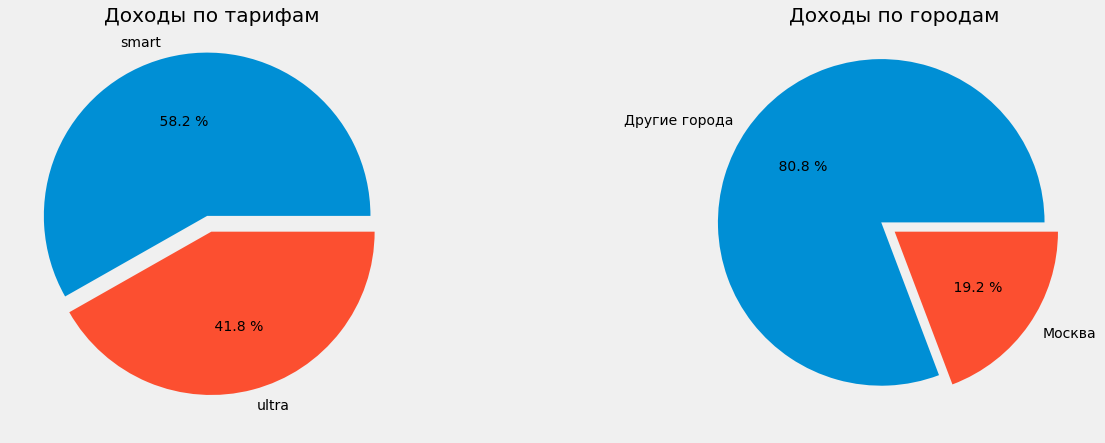

In [44]:
tariffs = df.pivot_table(index='tariff', values='income', aggfunc='sum')['income']
cities = df.pivot_table(index='city_group', values='income', aggfunc='sum')['income']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
myexplode = [0.1, 0]
ax1.pie(tariffs, labels=['smart', 'ultra'], autopct='% 1.1f %%', explode = myexplode)
ax1.set_title('Доходы по тарифам')
ax2.pie(cities, labels=['Другие города', 'Москва'], autopct='% 1.1f %%', explode = myexplode)
ax2.set_title('Доходы по городам')
plt.show()

Как видим на графиках доходы между тарифами сопоставимы по общим сборам, доходы по остальным городам сильно превышают доходы по Москве

#### Выдвинем гипотезы:  

- H0 - средние доходы не отличтаются между пользователями двух тарифов.
- H1 - средние доходы между пользователями двух тарифов различны.  
---------------------------------
- H0 - средние доходы не отличтаются между пользователями из Москвы и остальных городов.
- H1 - средние доходы между пользователями из Москвы и остальных городов различны.

In [45]:
# Предварительно создадим мвссивы для удобства стат тестов
# Удалим все потенциательные значения NaN
ultra_sample = ultra_df['income'].dropna()
smart_sample = smart_df['income'].dropna()
moscow_sample = moscow_city['income'].dropna()
other_sample = other_city['income'].dropna()
alpha = .05

Сперва проведем тест на нормальность наших массивов. Применим критерий Шапиро-Вилка, который проверяет нулевую гипотезу о том, что данные имеют нормальное распределение

In [46]:
counter = 0
for i in (ultra_sample, smart_sample, moscow_sample, other_sample):
    counter += 1
    stat, p = st.shapiro(i)
    print(f'Для набора №{counter}: w статистика {stat:.4f}, p-уровень {p:.4%}')
    if p > alpha:
        print('Выборка похожа на нормальную (не отвергаем нулевую гипотезу)')
    else:
        print('Выборка не похожа на нормальную (отвергаем нулевую гипотезу)')
    print()

Для набора №1: w статистика 0.3627, p-уровень 0.0000%
Выборка не похожа на нормальную (отвергаем нулевую гипотезу)

Для набора №2: w статистика 0.8399, p-уровень 0.0000%
Выборка не похожа на нормальную (отвергаем нулевую гипотезу)

Для набора №3: w статистика 0.8995, p-уровень 0.0000%
Выборка не похожа на нормальную (отвергаем нулевую гипотезу)

Для набора №4: w статистика 0.8935, p-уровень 0.0000%
Выборка не похожа на нормальную (отвергаем нулевую гипотезу)



Тест показал что все наши наборы не являются нормальными. Поскольку наши выборки не имеют признаков нормального распределения применим попарно тест Левена, в противном случае применили бы тест Бартлетта. Оба эти теста проверяет нулевую гипотезу о том, что все входные выборки взяты из популяций с равной дисперсией

In [47]:
stat, p = st.levene(ultra_sample, smart_sample, center='mean')
print(f'Для выручки от разных тарифов p-уровень {p:.4%}')
if p > alpha:
    print('У выборок одинаковые дисперсии (не отвергаем нулевую гипотезу)')
else:
    print('У выборок разные дисперсии (отвергаем нулевую гипотезу)')

Для выручки от разных тарифов p-уровень 0.0000%
У выборок разные дисперсии (отвергаем нулевую гипотезу)


In [48]:
stat, p = st.levene(moscow_sample, other_sample, center='mean')
print(f'Для выручки по Москве и другим городам p-уровень {p:.4%}')
if p > alpha:
    print('У выборок одинаковые дисперсии (не отвергаем нулевую гипотезу)')
else:
    print('У выборок разные дисперсии (отвергаем нулевую гипотезу)')

Для выручки по Москве и другим городам p-уровень 2.9813%
У выборок разные дисперсии (отвергаем нулевую гипотезу)


После того как мы выяснили что попарно сравниваемые выборки доходов по тарифам и городам имеют разнве дисперсии, для точности добавим в Т-тест пареметр `equal_var=Falce`

In [49]:
results = st.ttest_ind(ultra_sample, smart_sample, equal_var=False)
alpha = .05
print(f'Гипотеза о равенстве доходов тарифов Ultra и Smart')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')

Гипотеза о равенстве доходов тарифов Ultra и Smart
p-значение: 0.000%
Отклоняем нулевую гипотезу


In [50]:
results = st.ttest_ind(moscow_sample, other_sample, equal_var=False)
alpha = .05
print(f'Гипотеза о равенстве доходов в Москве и других городах:')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')

Гипотеза о равенстве доходов в Москве и других городах:
p-значение: 41.031%
Недостаточно оснований отклонить нулевую гипотезу


**Тесты говорят о том что вероятность получить такие или большие отклонения в средних доходат от двух тарифов при условии что гипотеза об их равестве верна, приближается к нулю. Следовательно эту гипотезу принимать нельзя и скорее всего эти средние действительно различны.**

**В разрезе Москвы и других городов вероятность случайно получить наблюдаемые различия в средних доходах довольно велика - более 50%. Следовательно нет оснований отклонять нулевую гипотезу**

## Общий вывод 
[к оглавлению](#step_0)

- Доходы оператора полученные от тирифа Ultra немного уступают в абсолютных значениях тарифу Smart. Но преимущества Ultra в гарантированности дохода, что позволит гарантированно покрывать постоянные издержки и в экономии на мощностях, так как клиенты зачастую не добираются до своих лимитов и обеспечивают выручку малыми затратами. 

- И в тарифе Smart есть свои плюсы. Он более массовый и более гибкий. Пользователи полагая что подписываются на более дешевый тариф в итоге все равно в среднем тратят на него в два раза больше. А в силу такого что пользователей тарифа Smart больше, доход компании по этому направлению выше.

- Все же можно в этой системе поменять некоторые настройки чтобы выжать больше из имеющегося ресурса:

<a class="anchor" id="step_5"></a>

Добавим распределение структуры выручки от двух тарифов

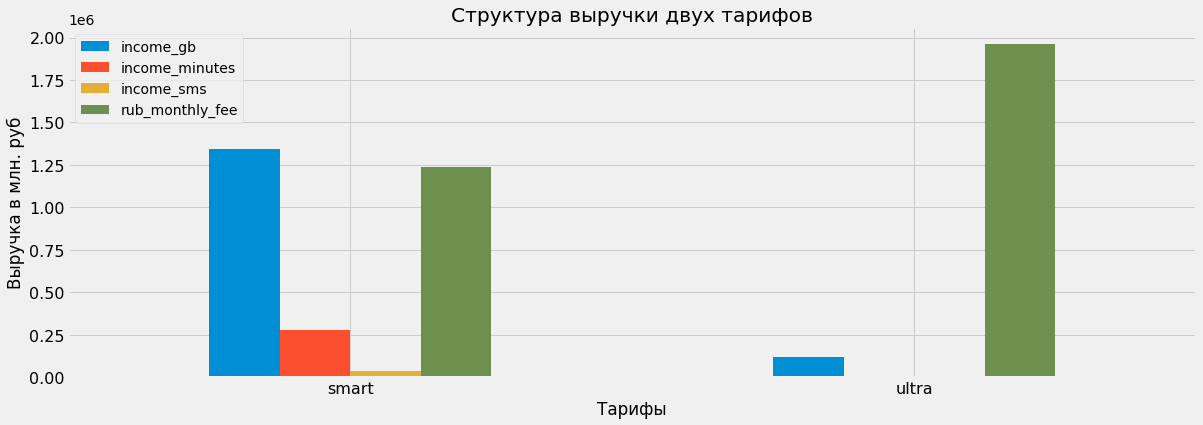

In [51]:
df.pivot_table(index='tariff', values=['income_minutes', 'income_gb', 'income_sms', 'rub_monthly_fee'], aggfunc='sum').plot(kind='bar', grid=True)
plt.title('Структура выручки двух тарифов')
plt.xlabel('Тарифы')
plt.ylabel('Выручка в млн. руб')
plt.tick_params(labelsize = 16, labelrotation = 0)
plt.show()

Структура демонстрирует перерасход по всем статьям у пользователей Smart, но у пользователей Ultra остается достаточно невыработанных минут и смс. Можно попробовать перераспределить мощности, а именно - сократить не на много лимиты минут и смс у Ultra и добавить их к Smart. Первые не особо ощутят изменений, а вторым будет приятно. Таким образом компания сможет сохранить позиции по выручке Ultra и увеличит количество и клиентов Smart, а как следствие и общую выручку.  

**Окончатальное решение по поводу перераспределения рекламного бюджета стоит принимать в сторону развития Smart в силу его массовости, при обязательном сохранинии позиций Ultra в силу его стабильности.**